In [38]:
from get_train_test_data import get_data
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
training = [r"/1trn.SSV", r"/2trn.SSV" , r"/3trn.SSV", r"/4trn.SSV", r"/5trn.SSV", r"/6trn.SSV", r"/7trn.SSV"]
testing = [r"/1tst.SSV", r"/2tst.SSV" , r"/3tst.SSV", r"/4tst.SSV", r"/5tst.SSV", r"/6tst.SSV", r"/7tst.SSV"]
master_train = get_data(training)
master_test = get_data(testing)
csv_path = "C:/Users/edgil/Documents/Masters/machine_learning/Coursework/video_data"

26042    253952.00
26043    253952.00
26044    253952.00
26045    253952.00
26046    291310.75
Name: 14, dtype: float64


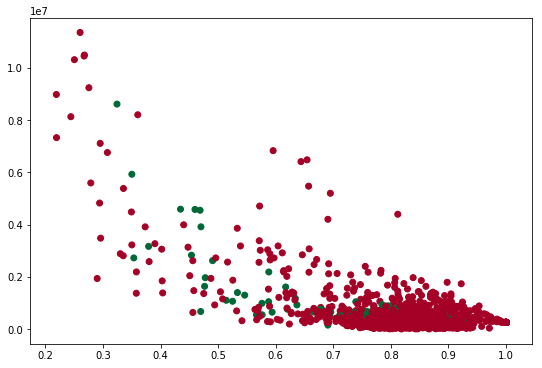

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.scatter(master_test.loc[:,9].tail(2000),master_test.loc[:,14].tail(2000), cmap = "RdYlGn" 
           , c = master_test.loc[:,16].tail(2000).apply(np.sign) )
fig = ax.get_figure()
fig.savefig("BadTest.png")

In [39]:
master_test = master_test.replace(253952,np.nan)
master_test = master_test.dropna(axis = 0,how = "any")
print(len(master_test))
#print(mx.tail())
print(master_test.loc[:,14].tail())
new_col_names = ["p1", "p2","p3", "p4","p5","p6","p7","p8","p9","p10","p11","p12","p13","p14","p15","p16","target"]
col_names = dict(zip(list(master_train.columns),new_col_names ))
master_train.rename(columns = col_names, inplace=True)
master_test.rename(columns = col_names, inplace=True)

25760
26026    4.395290e+06
26027    1.789819e+06
26028    7.829372e+05
26029    3.400356e+05
26046    2.913108e+05
Name: 14, dtype: float64


In [40]:
# set all the abnormal data as 1, lie in 16 column
master_train.loc[master_train['target'] == 255,'target'] = 1
master_test.loc[master_test['target'] == 255,'target'] = 1
X_test = master_test.loc[:, master_test.columns != "target"] 
Y_test = pd.DataFrame(master_test['target'], columns = ["target"])
X = master_train.loc[:, master_train.columns != "target"]
Y = pd.DataFrame(master_train['target'], columns = ["target"])
# isolate the abnormal data
abnormal_sample = master_train[master_train['target'] == 1]
normal_sample = master_train[master_train['target'] == 0]
#print(train_data.head())

In [41]:
# Standardise the data using sklearn
from sklearn import preprocessing
# transform X vector into mean 0 and variance 1
X_norm = pd.DataFrame(preprocessing.scale(X), columns = list(X.columns))
# Should we normalise the test set using the test data?
# We also want to run LOOCV on the data
X_test_norm = pd.DataFrame(preprocessing.scale(X_test), columns = list(X_test.columns))

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


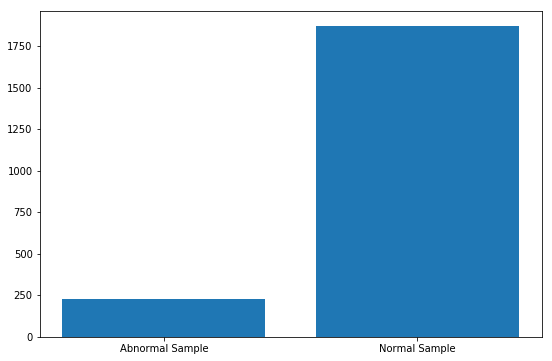

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


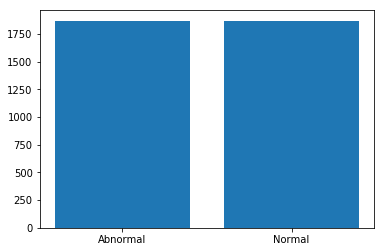

In [42]:
fig = plt.figure(2, figsize=(9, 6))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
plt.bar(["Normal", "Abnormal"],Y['target'].value_counts())
ax.set_xticklabels(['Abnormal Sample', 'Normal Sample'])#ax.get_figure().savefig("imbalanced_data.png")
plt.show()
# Now we have balanced data.
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_norm, Y)
X_train = pd.DataFrame(X_train, columns = new_col_names[:-1])
y_train = pd.DataFrame(y_train, columns= ['target'])
plt.bar(["Normal", "Abnormal"],y_train['target'].value_counts())
ax1.set_xticklabels(['Abnormal Sample', 'Normal Sample'])
ax1.get_figure().savefig("LARGE_balanced_data.png")
plt.show()
#print(y_train['target'].value_counts())

In [43]:
# Run PCA on the predictor variables
from sklearn.decomposition import PCA
X_test_pca = X_test_norm.dropna(axis = 0, how = "any")
X_norm = X_train.dropna(axis = 0, how = "any")
pca_data = PCA(n_components=5)
# find the PCs
pca = pca_data.fit_transform(X_norm)
pca_test = pca_data.fit_transform(X_test_pca)
principalDf = pd.DataFrame(data = pca
             , columns = ['PC1', 'PC2', "PC3","PC4","PC5"])
principalDf_test = pd.DataFrame(data = pca_test
             , columns = ['PC1', 'PC2', "PC3","PC4","PC5"])
PC_train = pd.concat([principalDf, y_train[['target']]], axis = 1)
PC_test = pd.concat([principalDf_test, y_train[['target']]], axis = 1)
# Find the variance explained within each PC
var_exp = pca_data.explained_variance_ratio_
print("Total Variance explained using 5 principle components is : %s" % sum(var_exp))

Total Variance explained using 5 principle components is : 0.9925081656551527


In [83]:
principalDf_test.shape

(25760, 5)

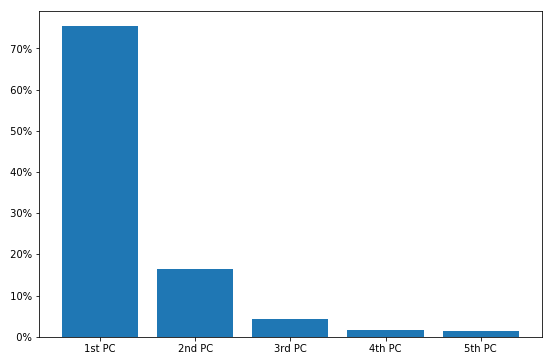

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.bar(['1st PC', '2nd PC', "3rd PC", "4th PC", "5th PC"],var_exp[:5])
ax.set_xticklabels(['1st PC', '2nd PC', "3rd PC","4th PC", "5th PC"])
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
fig = ax.get_figure()
fig.savefig("varianeExpTrn1.png")

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Feature ranking:
1. feature 8 (0.131038)
2. feature 9 (0.104131)
3. feature 14 (0.091125)
4. feature 11 (0.088933)
5. feature 10 (0.088149)
6. feature 6 (0.075392)
7. feature 0 (0.057675)
8. feature 1 (0.056796)
9. feature 2 (0.052887)
10. feature 12 (0.050966)
11. feature 5 (0.045437)
12. feature 3 (0.041274)
13. feature 7 (0.034527)
14. feature 15 (0.030882)
15. feature 13 (0.026650)
16. feature 4 (0.024140)


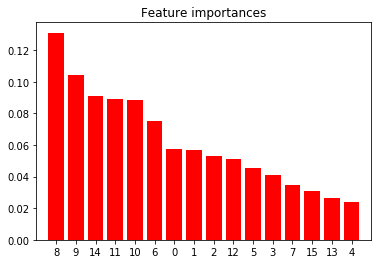

In [45]:
# Decision trees
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#import graphviz
import os
#os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
X_test, Y_test = X_test_norm, Y_test # we need to change the X_test to pca version if using that (X_test_norm,principalDf_test
X , Y = X_train, y_train # set X_train = principalDf
#### This is where we choose and set up the models!
RF = RandomForestClassifier(n_estimators=150,max_features=2)
RF.fit(X, Y)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#### DT Feature Imp
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show() 

In [96]:
y_pred = clf.predict(X_test)
RF_y_pred = RF.predict(X_test)
print("DT Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print("RF Accuracy:", metrics.accuracy_score(Y_test, RF_y_pred))

DT Accuracy: 0.7055124223602485
RF Accuracy: 0.7687888198757764
